<a href="https://colab.research.google.com/github/Valmir-unicap/Inteligencia-Artificial/blob/main/Quest%C3%A3o_2_Lista_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 2: Classificação Binária (Regressão Logística e Redes Neurais) – 10%

## *Aluno:* Valmir Alves da Cunha Júnior

Base de Dados Sugerida: Utilize a base de dados "Pima Indians Diabetes" também disponível no UCI Machine Learning Repository (ver código no final deste documento). Ela contém informações de saúde e diagnóstico para prever o desenvolvimento de diabetes.

Objetivo: Classificar pacientes como diabéticos ou não diabéticos com base em uma ou mais variáveis preditoras.

#### Etapas da Atividade:
- Carregue e explore os dados para compreender as variáveis e verificar a presença de
valores ausentes.
- Treine um modelo de regressão logística para prever se um paciente desenvolverá
diabetes com base em uma variável preditora (exemplo: concentração de glicose).
- Treine um modelo de rede neural (com duas camadas ocultas e ativação sigmoidal) para
realizar a mesma tarefa.
- Avalie os modelos utilizando métricas como acurácia, precisão, recall e F1-score.
- Visualize as curvas ROC e calcule a AUC (Área Sob a Curva) para comparar os
desempenhos.

In [85]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [63]:
# Carregar a base de dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age",
"Outcome"]
data = pd.read_csv(url, header=None, names=columns)

In [64]:
# Exibindo a base de dados
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [65]:
# Separar as variáveis preditoras e alvo
X = data[['Glucose']].values # Escolher uma variável preditora (Exemplo: 'Glucose')
y = data['Outcome'].values # Variável alvo (0 ou 1)

In [66]:
X

array([[148],
       [ 85],
       [183],
       [ 89],
       [137],
       [116],
       [ 78],
       [115],
       [197],
       [125],
       [110],
       [168],
       [139],
       [189],
       [166],
       [100],
       [118],
       [107],
       [103],
       [115],
       [126],
       [ 99],
       [196],
       [119],
       [143],
       [125],
       [147],
       [ 97],
       [145],
       [117],
       [109],
       [158],
       [ 88],
       [ 92],
       [122],
       [103],
       [138],
       [102],
       [ 90],
       [111],
       [180],
       [133],
       [106],
       [171],
       [159],
       [180],
       [146],
       [ 71],
       [103],
       [105],
       [103],
       [101],
       [ 88],
       [176],
       [150],
       [ 73],
       [187],
       [100],
       [146],
       [105],
       [ 84],
       [133],
       [ 44],
       [141],
       [114],
       [ 99],
       [109],
       [109],
       [ 95],
       [146],
       [100],
      

In [67]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [80]:
X.shape, y.shape

((768, 1), (768,))

In [70]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train

array([[ 84],
       [112],
       [139],
       [161],
       [134],
       [130],
       [132],
       [161],
       [108],
       [ 80],
       [ 87],
       [171],
       [ 88],
       [146],
       [191],
       [122],
       [159],
       [100],
       [123],
       [123],
       [155],
       [102],
       [125],
       [100],
       [104],
       [131],
       [145],
       [152],
       [100],
       [147],
       [128],
       [100],
       [ 80],
       [ 84],
       [194],
       [123],
       [ 78],
       [106],
       [129],
       [129],
       [ 61],
       [ 81],
       [102],
       [ 99],
       [107],
       [170],
       [ 85],
       [102],
       [ 97],
       [127],
       [133],
       [ 94],
       [ 83],
       [123],
       [187],
       [152],
       [129],
       [106],
       [111],
       [111],
       [143],
       [124],
       [165],
       [108],
       [137],
       [179],
       [171],
       [ 83],
       [101],
       [120],
       [ 89],
      

In [72]:
X_test

array([[ 98],
       [112],
       [108],
       [107],
       [136],
       [103],
       [ 71],
       [117],
       [154],
       [147],
       [111],
       [179],
       [148],
       [ 96],
       [ 88],
       [125],
       [ 84],
       [ 86],
       [183],
       [140],
       [104],
       [ 88],
       [106],
       [ 96],
       [129],
       [184],
       [109],
       [100],
       [102],
       [ 89],
       [162],
       [146],
       [184],
       [167],
       [109],
       [152],
       [197],
       [109],
       [121],
       [131],
       [ 85],
       [135],
       [109],
       [104],
       [ 92],
       [158],
       [111],
       [ 95],
       [112],
       [173],
       [ 94],
       [145],
       [140],
       [134],
       [139],
       [ 74],
       [158],
       [ 80],
       [121],
       [168],
       [154],
       [122],
       [129],
       [ 92],
       [ 84],
       [147],
       [ 81],
       [137],
       [104],
       [172],
       [150],
      

In [73]:
y_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [74]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [75]:
X_test.shape, X_train.shape

((154, 1), (614, 1))

In [76]:
# 1. Modelo de Regressão Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [77]:
logistic_model

LogisticRegression()

In [78]:
y_pred_logistic

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [79]:
# Avaliar o modelo de regressão logística
print("Regressão Logística:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logistic):.2f}")

Regressão Logística:
Accuracy: 0.75
Precision: 0.70
Recall: 0.55
F1-Score: 0.61


## Grafico curva de precisão para Regressão Lógistica

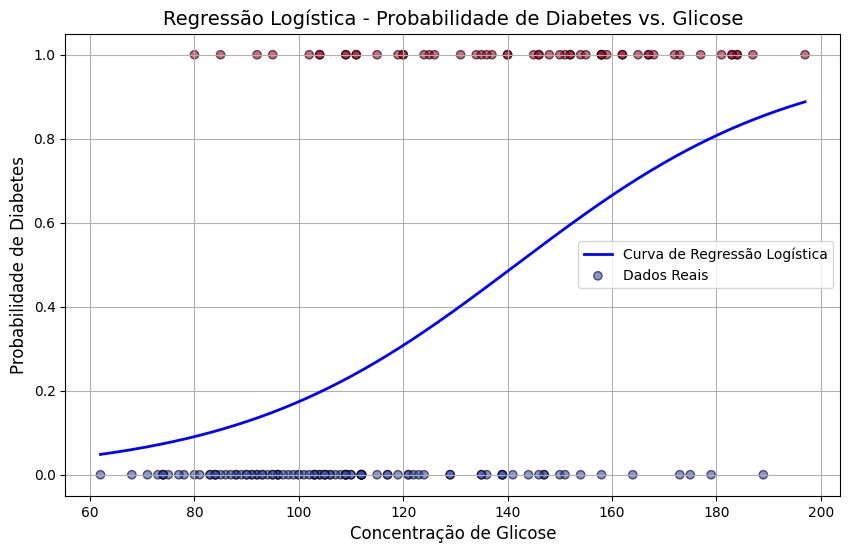

In [91]:
# Gerar uma sequência de valores de glicose para plotar a curva sigmoidal
glucose_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 300).reshape(-1, 1)

# Prever as probabilidades de diabetes para os valores de glicose no intervalo
y_prob_logistic_curve = logistic_model.predict_proba(glucose_range)[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(glucose_range, y_prob_logistic_curve, color='blue', label='Curva de Regressão Logística', lw=2)
plt.scatter(X_test[:, 0], y_test, c=y_test, cmap='coolwarm', edgecolors='k', marker='o', label='Dados Reais', alpha=0.6)
plt.title('Regressão Logística - Probabilidade de Diabetes vs. Glicose', fontsize=14)
plt.xlabel('Concentração de Glicose', fontsize=12)
plt.ylabel('Probabilidade de Diabetes', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [116]:
# 2. Modelo de Rede Neural
nn_model = Sequential([
Dense(10, activation='relu', input_shape=(1,)),
Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
# Treinar o modelo de rede neural
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5057 - loss: 0.9333
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - loss: 0.6882
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6043 - loss: 0.6959
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5772 - loss: 0.6880
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5956 - loss: 0.6763
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5860 - loss: 0.6740
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6207 - loss: 0.6762
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6477 - loss: 0.6587
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6592 - loss: 0.6588
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6923 - loss: 0.6333
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6602 - loss: 0.6377
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5942 - lo

In [118]:
# Avaliar o modelo de rede neural
y_pred_nn = nn_model.predict(X_test).round()
print("Rede Neural:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nn):.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Rede Neural:
Accuracy: 0.69
Precision: 0.54
Recall: 0.84
F1-Score: 0.66


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


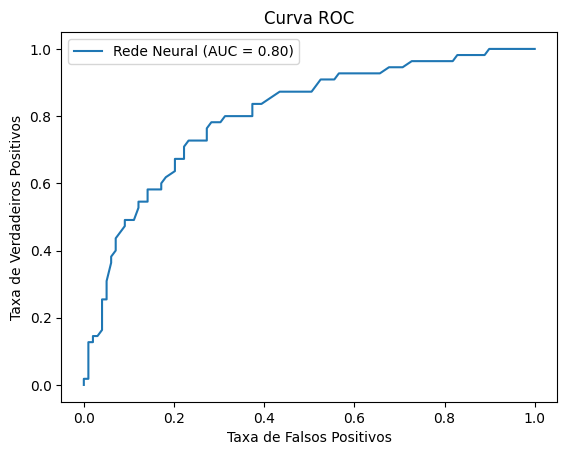

In [119]:
# Curva ROC para o modelo neural
fpr, tpr, thresholds = roc_curve(y_test, nn_model.predict(X_test))
plt.plot(fpr, tpr, label="Rede Neural (AUC = {:.2f})".format(roc_auc_score(y_test, nn_model.predict(X_test))))
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

## Analise Comparativa da Regressão Logística vs Rede Neural

In [120]:
print("Regressão Logística:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logistic):.2f}")
print("--------------------------")
print("Rede Neural:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nn):.2f}")

Regressão Logística:
Accuracy: 0.75
Precision: 0.70
Recall: 0.55
F1-Score: 0.61
--------------------------
Rede Neural:
Accuracy: 0.69
Precision: 0.54
Recall: 0.84
F1-Score: 0.66


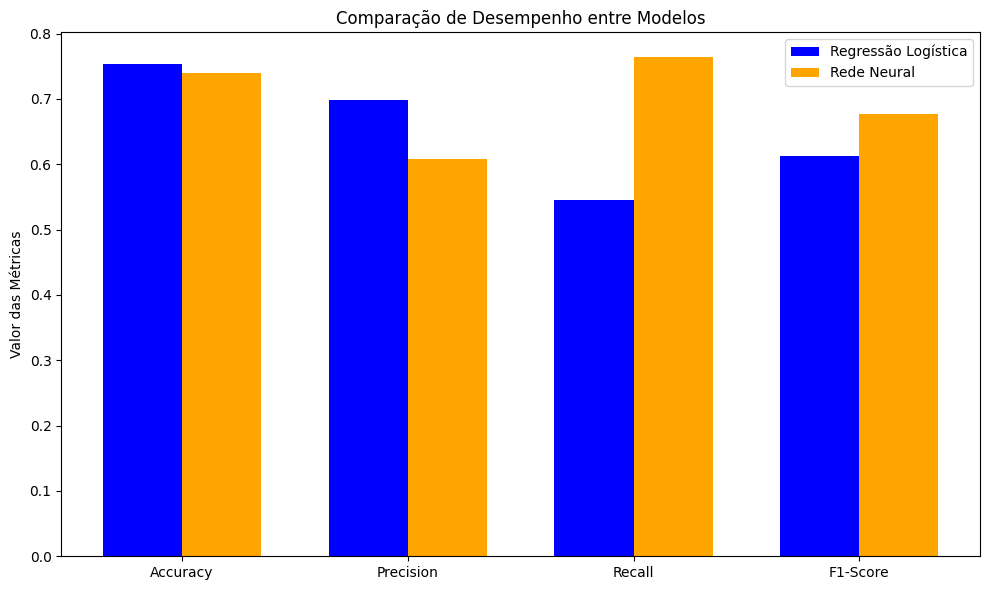

In [130]:
# Gráficos de comparação das métricas (Accuracy, Precision, Recall, F1-Score)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
logistic_metrics = [
    accuracy_score(y_test, y_pred_logistic),
    precision_score(y_test, y_pred_logistic),
    recall_score(y_test, y_pred_logistic),
    f1_score(y_test, y_pred_logistic)
]
nn_metrics = [
    accuracy_score(y_test, y_pred_nn),
    precision_score(y_test, y_pred_nn),
    recall_score(y_test, y_pred_nn),
    f1_score(y_test, y_pred_nn)
]

# Criar gráfico de barras para as métricas
x = range(len(metrics))
width = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, logistic_metrics, width, label='Regressão Logística', color='blue')
ax.bar([p + width for p in x], nn_metrics, width, label='Rede Neural', color='orange')

# Personalizar gráfico
ax.set_ylabel('Valor das Métricas')
ax.set_title('Comparação de Desempenho entre Modelos')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

## Análise dos resultados obtidos

- A Regressão Logística teve uma acurácia superior (75%) comparada à rede neural (69%). Isso significa que, em geral, o modelo de regressão logística obtém previsões mais corretas no conjunto de testes.

- A precisão da regressão logística foi de (70%) é ligeiramente superior à da rede neural (54%). A precisão mede a proporção de acertos entre os casos previstos como positivos.

- A regressão logística tem um alto *recall* (55%), enquanto as redes neurais têm um recall muito maior (84%). Recall mede a capacidade do modelo de identificar corretamente casos positivos (diabetes).

- O F1-Score, que é a média harmônica entre precisão e recall, favorece bastante a Rede Neural (0.66) em relação à Regressão Logística (0.61). Isso acontece porque a Regressão Logística tem um recall muito baixo, o que afeta muito a pontuação final do F1-Score.

## Se aplicarmos menos épocas teremos um resultado melhor da Rede Neural?

In [121]:
# Treinar o modelo de rede neural
nn_model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7149 - loss: 0.5862
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6669 - loss: 0.5967
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7054 - loss: 0.5799
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7520 - loss: 0.5626
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6892 - loss: 0.5776
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7288 - loss: 0.5525
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7266 - loss: 0.5584
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7266 - loss: 0.5336
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6942 - loss: 0.5777
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7225 - loss: 0.5554


In [122]:
# Avaliar o modelo de rede neural
y_pred_nn = nn_model.predict(X_test).round()
print("Rede Neural:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nn):.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Rede Neural:
Accuracy: 0.74
Precision: 0.61
Recall: 0.76
F1-Score: 0.68


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


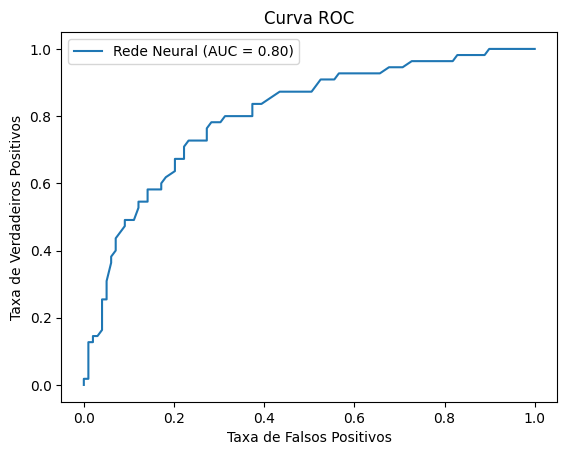

In [123]:
# Curva ROC para o modelo neural
fpr, tpr, thresholds = roc_curve(y_test, nn_model.predict(X_test))
plt.plot(fpr, tpr, label="Rede Neural (AUC = {:.2f})".format(roc_auc_score(y_test, nn_model.predict(X_test))))
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [124]:
print("Regressão Logística:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logistic):.2f}")
print("--------------------------")
print("Rede Neural:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nn):.2f}")

Regressão Logística:
Accuracy: 0.75
Precision: 0.70
Recall: 0.55
F1-Score: 0.61
--------------------------
Rede Neural:
Accuracy: 0.74
Precision: 0.61
Recall: 0.76
F1-Score: 0.68


## Percebi com menos épocas a rede Neural consegue ter um resultado melhor, em relação com mais épocas, aparenta estar o ocorrendo overfitting.

- Com 50 épocas, a rede neural pode ter ficado adaptada aos dados de treino, o que faz com que ela tenha uma performance pior em dados que nunca viu antes (o conjunto de teste).

- Com 10 épocas, a rede neural pode ter aprendido o suficiente para identificar padrões gerais sem se concentrar em detalhes irrelevantes.

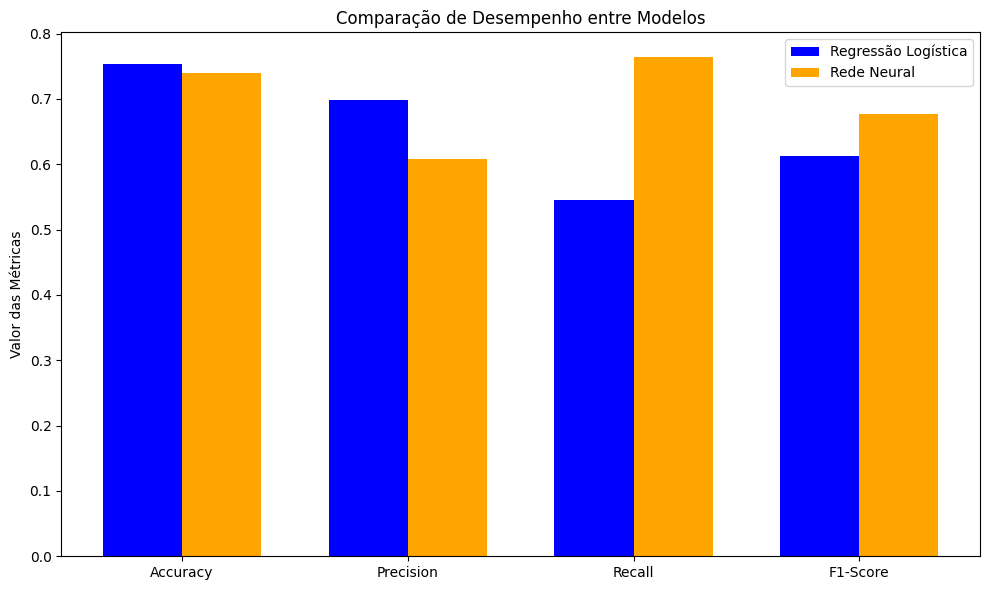

In [126]:
# Gráficos de comparação das métricas (Accuracy, Precision, Recall, F1-Score)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
logistic_metrics = [
    accuracy_score(y_test, y_pred_logistic),
    precision_score(y_test, y_pred_logistic),
    recall_score(y_test, y_pred_logistic),
    f1_score(y_test, y_pred_logistic)
]
nn_metrics = [
    accuracy_score(y_test, y_pred_nn),
    precision_score(y_test, y_pred_nn),
    recall_score(y_test, y_pred_nn),
    f1_score(y_test, y_pred_nn)
]

# Criar gráfico de barras para as métricas
x = range(len(metrics))
width = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, logistic_metrics, width, label='Regressão Logística', color='blue')
ax.bar([p + width for p in x], nn_metrics, width, label='Rede Neural', color='orange')

# Personalizar gráfico
ax.set_ylabel('Valor das Métricas')
ax.set_title('Comparação de Desempenho entre Modelos')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()